# Project: No_Show Medical Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#sanity_check">Sanity Check</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

In order to answer the question of whether or not patients actually show up for their appointment after making a doctor's appointment, I will be studying a dataset made up of data gathered from over 100,000 medical appointments in Brazil. Each row contains information about a different patient trait.

In particular, I am interested in finding trends among patients who show up for their appointments and how they differ from the patients who did not show up for their appointents.

The following are the packages we'll be needing for the analysis
- Numpy
- Pandas
- Matplotlib
- Seaborn - Makes visualizations looks nice

In [1]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#This help visualization pop up in notebooks rather than on a different tab
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

We'll import the data, examine it to determine its structure, and then determine any modifications that need to be made by cleaning and trimming the data to prepare it for analysis in this section.

Therefore, we'll be cleaning and inspecting data in this section.

### Data Inspection

In [2]:
# Data loading and storing in the variable "patient df"
patient_df = pd.read_csv('No_Show-Appointment.csv')

# printing out few lines from the data
patient_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The output above shows how the table appears.

In the columns for Scholarship, Hipertension, Diabetes, Alcoholism and Handcap, "Yes" was encoded with 1 and "No" with 0.

The following describe the patients' characteristics as they appear in the dataset:
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male(M) or Female(F)
- ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
- AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
- Age: How old is the patient
- Neighbourhood: Where the appointment takes place.
- Scholarship: Yes or No (indicates whether or not the patient is enrolled in Brasilian welfare program)
- Hipertension: Yes or No (indicates whether or not the patient is hypertensive)
    - Spelling error in hypertension
- Diabetes: Yes or No (indicates whether or not the patient is diabetic)
- Alcoholism: Yes or No (indicates whether or not the patient is diagnosed with alcoholism)
- Handcap: Classification of handicap from 0 - 4.
    - Spelling error in handicap
- SMS_received: Yes or No (indicates whether or not the patient received an SMS for their scheduled appointment)
- No-show: Yes or No (indicates whether or not the patient showed up for their appointment)
    - It says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.

In [3]:
# examining the data's form
patient_df.shape

(110527, 14)

The above output shows that there are 110,527 patients record and 14 coulmns(characteristivs about the patients).

In [4]:
# Displaying some information about the dataframe
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In light of the output seen above:
- None of the columns have any missing values.
- The ScheduledDay column's data type, object, is questionable and requires investigation.
- The AppointmentDay column's data type, object, is questionable and requires investigation.
- Because they are all represented as 1 and 0, the data types for Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, and SMS_received are all integers.

In [5]:
# Checking for duplicates
patient_df[patient_df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


The output above demonstrates that there are no duplicate data in the dataframe.

In [6]:
# examining a few summary statistics
patient_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


According to the summary statistics above:
- The PatientID and the AppointmentID are just unique Identifers for the patient.
- From the age column, the minimum age is -1 which is alarming because there should not be negative age
- There are patients beyond the age of 100, however the majority of patients are between the ages of 18 and 55
- The majority of patients are not on scholarship, are not diabetic or hypertensive, and did not receive SMS.

I want to from the above inspection

- Drop any columns that aren't necessary for the analysis.
- Fix some typos in the column names and lowercase all the column names.
- In ScheduledDay and AppointmentDay, extract the date from the string.
- Modify the data type of several columns.

### Data Cleaning

In [7]:
# Dropping PatientId and AppointmentID columns
# because they serve only as unique identifiers.
# They are unnecessary for this analysis

patient_df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [8]:
# Renaming the columns that include typos or special characters between two words
# in order to maintain consistency with the naming convention

patient_df.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap':'Handicap',
                         'SMS_received': 'SMSReceived',
                         'No-show': 'NoShow'}, inplace = True)

In [9]:
# For ease of access and memory, all column names will be changed to lower case.
# This will also ensure that the naming convention is consistent.

patient_df.columns = patient_df.columns.str.lower()

In [10]:
# Verifying the column name to determine if the modifications mentioned above have taken effect.
patient_df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'smsreceived', 'noshow'],
      dtype='object')

In [11]:
# Function for extracting date from string column

def dateExtraction(dataframe, columnName):
    return dataframe[columnName].str.slice(0, 10)

In [12]:
# Using dateExtraction function to extract date scheduledday column
# and adding it back to the dataframe's column.

patient_df['scheduledday'] = dateExtraction(patient_df, 'scheduledday')

In [13]:
# Using dateExtraction function to extract date appointmentday column
# and adding it back to the dataframe's column.

patient_df['appointmentday'] = dateExtraction(patient_df, 'appointmentday')

In [14]:
# Converting ScheduledDay and AppointmentDay's data types to datetime
# Reassigning it to the dataframe so that updates can be made

patient_df[['scheduledday','appointmentday']] = patient_df[['scheduledday','appointmentday']].apply(pd.to_datetime, format='%Y-%m-%d')

In [15]:
# Recoding the NoShow column's "Yes" and "No" values to "1" and "0,"  respectively
# This will cause the column's data type to be changed automatically to "integer."
# This is to be able to have a glance of the column from summary statistics table

patient_df['noshow'] = patient_df['noshow'].map({'Yes': 1, 'No': 0})

In [16]:
# Checking for patients who are younger than 0 years old in order to make decisions
# based on the minimum of -1 years old shown by the summary statistics above.

patient_df[patient_df.age < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


- Since there is only one patient with a negative age of -1, which is not achievable in real life, the output above led me to decide to remove this item from the dataframe. 
- **Note:** 0 age is possible as this can mean children who are a few months or years old.

In [17]:
# Dropping the row with a negative age as shown above
# Reassigning it to the dataframe so that updates can be made

patient_df = patient_df.drop(patient_df[patient_df.age < 0].index)

In [18]:
# Checking for patients who are younger than 0 years old in order again

patient_df[patient_df.age < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow


- We were able to remove the single row with the age of -1, leaving a dataframe with 110,526 patient records and 14 columns.

<a id='sanity_check'></a>
## Sanity checks after all the data cleaning

This section will do some sanity checks to determine whether the data cleaning and updates were applied appropriately.

In [19]:
# printing out few lines from the data
patient_df.head()

# It can be seen here that the dates have been extracted out
# and all of the columns' naming conventions are uniform.
# The no-show column has been recoded to 1 and 0.

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [20]:
# Displaying some information about the dataframe again

patient_df.info()

# As can be seen, scheduledday and appointmentday's Datatype has been changed to datetime
# and the other columns still have their proper Datatypes.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110526 non-null  object        
 1   scheduledday    110526 non-null  datetime64[ns]
 2   appointmentday  110526 non-null  datetime64[ns]
 3   age             110526 non-null  int64         
 4   neighbourhood   110526 non-null  object        
 5   scholarship     110526 non-null  int64         
 6   hypertension    110526 non-null  int64         
 7   diabetes        110526 non-null  int64         
 8   alcoholism      110526 non-null  int64         
 9   handicap        110526 non-null  int64         
 10  smsreceived     110526 non-null  int64         
 11  noshow          110526 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 11.0+ MB


In [21]:
# examining the summary statistics again
patient_df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Below is a graphic representation of the explanation I provided earlier when I first examined the dataframe's summary statistics. This is to support the prior argument I made, and I think it is consistent with what the summary data show.

Additionally, keep in mind that:
- It is evident that most patients arrive for their appointments.
- However, from a different perspective and based on the histogram below, it is evident that around 25,000 people did not show up for their appointment.
- For me, this is a significant number of no-shows because health is so essential.

Having said that, in the part that follows, we'll examine what may have caused them to miss their meetings as well as the categories into which most of them fit based on their individual traits. based on the available data.

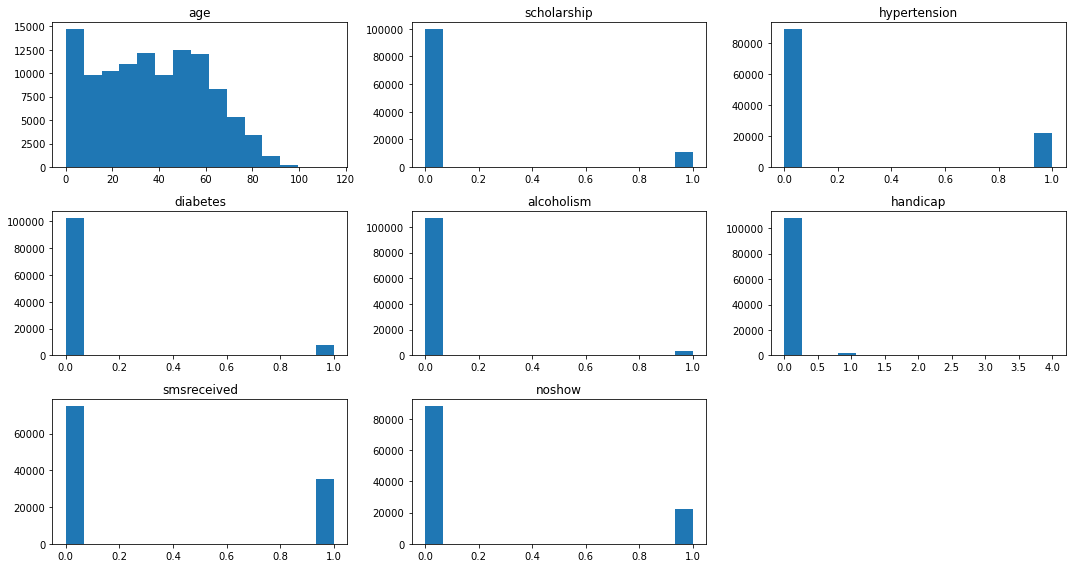

In [22]:
# Examining the dataframe's histogram for a few chosen (numerical) columns
patient_df.hist(column=["age", "scholarship", "hypertension", "diabetes", "alcoholism", "handicap", "smsreceived", "noshow"],
                figsize = (15, 8), grid = False, bins = 15);

plt.tight_layout() # This is to give some spacing between the graphs

<a id='eda'></a>
## Exploratory Data Analysis

We will use this part to compare some characteristics and determine the causes of the approximately 25,000 patients who did not show up for their appointment.

noshow = dependent variable (since this is the column that answer the question of whether a patient show up or not).

other columns = inndependent variable.

In [23]:
# Making a mask for the rows where patients arrive for their appointments and the rows where they do not arrive
# this will make it simpler to retrieve these rows in the future.

showup = patient_df['noshow'] == False
noshowup = patient_df['noshow'] == True

In [24]:
# print out a few lines for the patients that showed up
patient_df[showup].head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [25]:
# print out a few lines for the patients that did not showed up
patient_df[noshowup].head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1


### I want to see if the patient's absence at their appointment was due to them not having a scholarship.

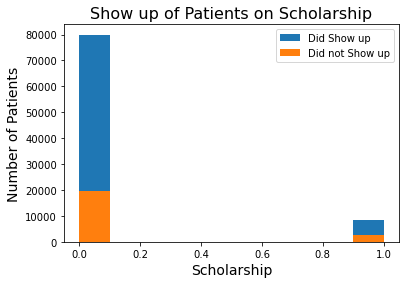

In [26]:
# Making a visual relationship between receiving a scholarship and showing up for appointment
patient_df.scholarship[showup].hist(label = 'Did Show up'),
patient_df.scholarship[noshowup].hist(label = 'Did not Show up');
plt.grid(False)
plt.title('Show up of Patients on Scholarship', fontsize=16)
plt.xlabel('Scholarship', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend();

- Since they are on scholarships, I anticipate that practically all of the patients will show up for their appointments.
- It's possible that not receiving a scholarship will prevent some patients from attending.
- The illustration above revealed that 20% of the patients who were not covered by the scholarship did not arrive for their scheduled session.

### I'm curious to know if there are any gender-specific reasons why patients missed their appointments.

The purpose of this inquiry is to determine which gender category the majority of the patients who did not appear belong to.

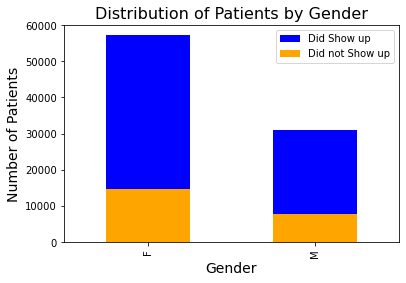

In [27]:
# Comparing the gender distribution between patients who attended and those who did not

patient_df.gender[showup].value_counts().plot(kind='bar', color= 'blue', label='Did Show up')
patient_df.gender[noshowup].value_counts().plot(kind='bar', color= 'orange', label='Did not Show up')
plt.title('Distribution of Patients by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend();

The visual above demonstrate that the majority of the patients that have appointments with the doctor are female (about 65%). This may be due to the fact that the majority of our patients are between the ages of 18 and 55 and need medical care due to things like pregnancy and similar conditions. Nevertheless, a sizable percentage of people missed their appointment.

### I also want to see if the number of days patients have to wait for their appointment affects the likelihood that they won't show up.

This inquiry is intended to determine whether too many days of waiting before an appointment is the cause of some people not showing up.

In [28]:
# Function for calculating difference between two dates
# and turning it into an integer.

def differenceBetweenDates(firstDate, secondDate, specification):
    return ((firstDate - secondDate)/np.timedelta64(1, specification)).astype(int)

In [29]:
# using differenceBetweenDates function
# to calculate the gap in months needed for a patient to wait for their appointment
# to determine the unique number of months, unique() method is used.

monthly_wait = differenceBetweenDates(patient_df.appointmentday, patient_df.scheduledday, 'M')
monthly_wait.unique()

array([0, 1, 2, 3, 5, 4])

In [30]:
# Counting the patients for each unique number of month.
monthly_wait.value_counts()

0    100148
1      8283
2      1934
3        76
5        55
4        30
dtype: int64

In [31]:
# using differenceBetweenDates function
# to calculate the gap in weeks needed for a patient to wait for their appointment
# to determine the unique number of weeks, unique() method is used.

weekly_wait = differenceBetweenDates(patient_df.appointmentday, patient_df.scheduledday, 'W')
weekly_wait.unique()

array([ 0,  1,  4,  3,  2,  6,  8,  5,  7,  9, 13, 12, 11, 16, 15, 10, 25,
       14, 20, 22, 23, 24, 19, 17, 21, 18])

In [32]:
# Counting the patients for each number of weeks.

weekly_wait.value_counts()

0     65846
1     14018
2      9926
3      6859
4      6229
5      2810
6      1312
8       902
7       857
9       772
10      428
12      204
11      146
13       74
25       26
15       23
14       23
19       12
23       11
22       10
20        9
17        9
16        8
24        8
18        3
21        1
dtype: int64

In [33]:
# Getting the total number of patient who waited for less than two weeks
# before their appointment day

weekly_wait.value_counts().values[:2].sum()

79864

In [34]:
# Getting the total number of patient who waited for two weeks and above
# before their appointment day

weekly_wait.value_counts().values[2:].sum()

30662

In [35]:
# Getting the percentage of patient who waited for less than two weeks
# and the percentage of patient who waited for two weeks and above

(79864/patient_df.shape[0])*100, (30662/patient_df.shape[0])*100

(72.25811121365109, 27.741888786348913)

- Examining the distinctions between the Scheduled day and appointment day is done using the few cells above.
- That is, to determine how many weeks or months a patient must wait between the day of the appointment they made and the day they are expected to show up.

<a id='conclusions'></a>
## Conclusions

As a result of my understanding and the information provided above,

- The data indicates that 88% of the patients arrived for their appointments, while 22% did not.
- Women make up the bulk of those who missed their appointment. This is not surprising considering that around 65% of all patients are female.

The obstacles that could prevent these few patients from showing up could most likely be

**1. Scholarship:** 20% of the patients on scholarship did not show up for their appointment, despite the fact that the majority of them did.

**2. Distance between Scheduled day and appointment day**
- A little more than 72% of patients must wait less than two weeks for an appointment.
- About 28% of patients have to wait more than two weeks for their appointment.
- This could also be the cause of some of them missing their appointments.

The limitation of this analysis is not having enough of patients attribute that can be used to measure why some patients fail to show up for their appointment. Attributes like the distance of Their homes to the hospital and the likes.

The research is limited by the lack of sufficient patient attributes that can be used to determine why certain patients miss their appointment. i.e. attributes like how far their homes are from the hospital and such things.

<a id='references'></a>
## References

- [Stack Overflow](https://stackoverflow.com/)
- [Geeks for Geeks](https://www.geeksforgeeks.org/)
- [W3 Schools](https://www.w3schools.com/)